# 4.3.3. Ley de Hooke generalizada para materiales isótropos

|Quién | Correo |Fecha | Qué hizo |
| ---  | ---    | ---  | ---      |
|Michael Heredia Pérez  | <mherediap@unal.edu.co> | Agosto 4, 2022 | Conversión de código de MAXIMA a Python|
|Juan Nicolás Ramírez   | <jnramirezg@unal.edu.co> | Octubre 3, 2023 | Adecuando código a particularidades pedagógicas|
|Diego Andrés Alvarez Marín | <daalvarez@unal.edu.co> | Marzo 26, 2024 | Mejorando los comentarios|

$$
\newcommand{\ve}[1]{{\vec{\boldsymbol{#1}}}}
\newcommand{\ma}[1]{{\boldsymbol{#1}}}
\newcommand{\hve}[1]{{\,\hat{\!\boldsymbol{#1}}}}
\newcommand{\tr}{\operatorname{tr}}
$$

In [1]:
from sympy import init_printing, latex, symbols, solve, factor, Matrix, simplify, linear_eq_to_matrix, trace, eye

# Para imprimir bonito
init_printing()
from IPython.display import Math                 
def imprimir (texto1, variable, texto2=""):
    return Math(texto1 +  rf'{latex(variable)}' + texto2)

Defino las variables:

In [2]:
ex, ey, ez    = symbols("varepsilon_x, varepsilon_y, varepsilon_z")
s_x, s_y, s_z = symbols("sigma_x, sigma_y, sigma_z")
E, nu         = symbols("E, nu")

A partir de las ecuaciones:
 
$\varepsilon_x = \displaystyle\frac{1}{E}\left(\sigma_x- \nu(\sigma_y+\sigma_z)\right)$

$\varepsilon_y = \displaystyle\frac{1}{E}\left(\sigma_y- \nu(\sigma_x+\sigma_z)\right)$

$\varepsilon_z = \displaystyle\frac{1}{E}\left(\sigma_z- \nu(\sigma_x+\sigma_y)\right)$

despejamos $\sigma_x$, $\sigma_y$ y $\sigma_z$.

Recuerde que en Python, se pueden escribir las ecuaciones sin el comando `sp.Eq()` igualando la ecuación a cero:

In [3]:
 eq_ex = ex - (1/E)*(s_x - nu*(s_y + s_z))
 eq_ey = ey - (1/E)*(s_y - nu*(s_x + s_z))
 eq_ez = ez - (1/E)*(s_z - nu*(s_x + s_y))

Despejo $\sigma_x$, $\sigma_y$ y $\sigma_z$ de las ecuaciones:

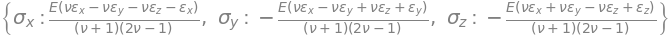

In [4]:
sol = factor(solve([eq_ex, eq_ey, eq_ez], [s_x, s_y, s_z]))
sol

Estas ecuaciones pueden reescribirse como:

$\sigma_x=\lambda e + 2G\varepsilon_x$

$\sigma_y=\lambda e + 2G\varepsilon_y$

$\sigma_z=\lambda e + 2G\varepsilon_z$

aquí $e = \varepsilon_{x} + \varepsilon_{y} + \varepsilon_{z}$ representa la dilatación cúbica

In [5]:
e = ex + ey + ez

y $\lambda$ y $G$ son las constantes de Lamé:

$\displaystyle \lambda = \frac{\nu E}{(1+\nu)(1-2\nu)}$

$\displaystyle G= \frac{E}{2(1+\nu)}$

In [6]:
# Recuerde que "lambda" es una palabra reservada de Python
lamda = nu*E/((1 + nu)*(1 - 2*nu)) # primera constante de Lamé
G     = E/(2*(1 + nu))             # segunda constante de Lamé

Ahora verificamos que la forma obtenida es equivalente con la que se presentó anteriormente:

In [7]:
sx = lamda*e + 2*G*ex
sy = lamda*e + 2*G*ey
sz = lamda*e + 2*G*ez

In [8]:
simplify(Matrix([sol[s_x] - sx,
                 sol[s_y] - sy,
                 sol[s_z] - sz]))

⎡0⎤
⎢ ⎥
⎢0⎥
⎢ ⎥
⎣0⎦

## Coeficientes de la matriz constitutiva $\boldsymbol{D}$

Se definen las variables las deformaciones angulares:

In [9]:
gxy, gxz, gyz = symbols("gamma_xy, gamma_xz, gamma_yz")

y se definen los esfuerzos cortantes:

$\tau_{xy}=G\gamma_{xy}$

$\tau_{xz}=G\gamma_{xz}$

$\tau_{yz}=G\gamma_{yz}$

In [10]:
txy = G*gxy
txz = G*gxz
tyz = G*gyz

Se despeja la matriz constitutiva $\ma{D}$ para el caso isótropo. En Maxima se emplea el comando `coefmatrix()`, pero en `Python+sympy` tenemos `linear_eq_to_matrix()`:

In [11]:
D = linear_eq_to_matrix([sx, sy, sz, txy, txz, tyz], 
                        [ex, ey, ez, gxy, gxz, gyz])[0]
imprimir(r"\ma{D} = ", D)

<IPython.core.display.Math object>

Podemos factorizar la matriz $\frac{E}{1+\nu}$ de la matriz $\boldsymbol{D}$ 

In [12]:
imprimir(r"\ma{D} = \frac{E}{1+\nu}", simplify(D / (E/(1+nu))))

<IPython.core.display.Math object>

**Nota:** Podrá pensar que el resultado es el negativo de lo que debería ser, pero no lo es, simplemente debe factorizar (-1) de los términos fraccionarios asociados a los esfuerzos normales.

Finalmente, la ley de Hooke generalizada para materiales isótropos en forma matricial es:

$$
\underbrace{%
\begin{bmatrix}
\sigma_x\\ \sigma_y\\ \sigma_z\\ \tau_{yz}\\ \tau_{xz}\\ \tau_{xy}\\\end{bmatrix}}_{\ve{\sigma}}
=
\underbrace{%
\frac{E}{1+\nu}
\begin{bmatrix}
\frac{1-\nu}{1-2\nu} & \frac{\nu}{1-2\nu}   &   \frac{\nu}{1-2\nu} &           0 &           0 & 0\\
\frac{\nu}{1-2\nu}   & \frac{1-\nu}{1-2\nu} &   \frac{\nu}{1-2\nu} &           0 &           0 & 0\\
\frac{\nu}{1-2\nu}   & \frac{\nu}{1-2\nu}   & \frac{1-\nu}{1-2\nu} &           0 &           0 & 0\\
                        0 &                         0 &                         0 & \frac{1}{2} &           0 & 0\\
                        0 &                         0 &                         0 &           0 & \frac{1}{2} & 0\\
                        0 &                         0 &                         0 &           0 &           0 & \frac{1}{2}
\end{bmatrix}}_{\ma{D}}
\underbrace{%
\begin{bmatrix}
\varepsilon_x\\ \varepsilon_y\\ \varepsilon_z\\ \gamma_{yz}\\ \gamma_{xz}\\ \gamma_{xy}\\
\end{bmatrix}}_{\ve{\varepsilon}}$$

## Cálculo de la matriz de conformidad

In [13]:
S = simplify(D**-1)
imprimir(r"\ma{S} = ", S)

<IPython.core.display.Math object>

## Sistema matricial con la ecuación 4.17

El sistema de ecuaciones anterior se puede expresar como una relación entre la matriz de tensiones $\ma{\sigma}$ y la de deformaciones matemáticas $\ma{\varepsilon}$:

$$\ma{\sigma} = \lambda \operatorname{tr}(\ma{\varepsilon}) + 2G\ma{\varepsilon}$$

Lo cual en notación tensorial se escribe como:

$$  \sigma_{ij} = \lambda \delta_{ij}\varepsilon_{kk} + 2G\varepsilon_{ij}  $$

In [14]:
# Defino las deformaciones angulares matemáticas
exy = gxy/2
exz = gxz/2
eyz = gyz/2

# Defino el tensor de deformaciones
epsilon = Matrix([[ ex,  exy,  exz],
                  [exy,   ey,  eyz],
                  [exz,  eyz,  ez ]])

# La matriz identidad de orden 3:
I = eye(3)

sigma = factor(lamda*trace(epsilon)*I + 2*G*epsilon)

Ahora, verificamos que ambas expresiones son equivalentes:

In [15]:
simplify(sigma - Matrix([[ sx,  txy,  txz],
                         [txy,   sy,  tyz],
                         [txz,  tyz,  sz ]]))

⎡0  0  0⎤
⎢       ⎥
⎢0  0  0⎥
⎢       ⎥
⎣0  0  0⎦

**NOTA:** Tenga en cuenta que las ecuaciones anteriores son válidas para materiales con comportamiento **elástico, lineal e isótropo**.